In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd yolov5_gun_detector2/

/content/drive/MyDrive/yolov5_gun_detector2


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!git pull

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
ls

test/  train/  valid/  yolov5/


In [ ]:
cd yolov5/

/content/drive/MyDrive/yolov5_gun_detector2/yolov5


In [ ]:
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
!pip install -qr requirements.txt wandb

     |████████████████████████████████| 1.8MB 5.0MB/s 
     |████████████████████████████████| 645kB 32.1MB/s 
     |████████████████████████████████| 133kB 40.0MB/s 
     |████████████████████████████████| 163kB 36.4MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 


In [ ]:
import torch
from IPython.display import Image, clear_output
from utils.google_utils import gdrive_download

torch.__version__

'1.8.1+cu101'

In [ ]:
#getting dataset

!curl -L "https://app.roboflow.com/ds/FG622UBgrc?key=EAesumiwKU" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: export/images/armas (693)_jpg.rf.539e7f818abfba8b13efc60c3eaa4b09.jpg  
 extracting: export/images/armas (1623)_jpg.rf.54322b09fff9789a2617f07a19f8f531.jpg  
 extracting: export/images/armas (772)_jpg.rf.5335483aeff9c87fd46a3a12e5a75f4d.jpg  
 extracting: export/images/armas (1101)_jpg.rf.53cb10cc7705158adb60227aa482711d.jpg  
 extracting: export/images/armas (623)_jpg.rf.53ee22796f191ca0eaf6124f4e133f5f.jpg  
 extracting: export/images/armas (2278)_jpg.rf.535d90355a01edf613c11d1d6168de3e.jpg  
 extracting: export/images/armas (2254)_jpg.rf.5451063a5496a056897d719fb4ccdc83.jpg  
 extracting: export/images/armas (1306)_jpg.rf.549461e692756d4a158af908e7eb8843.jpg  
 extracting: export/images/armas (2797)_jpg.rf.5518ea2e6baa681a051807d54dae5d9d.jpg  
 extracting: export/images/armas (1947)_jpg.rf.54cd92bf56c54ddc500de583356367a2.jpg  
 extracting: export/images/armas (304)_jpg.rf.54d3beb055395743c1d0df76e3214b6f.jpg  
 extrac

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive1/MyDrive/yolov5_gun_detector2/yolov5/export', output='/content/drive1/MyDrive/yolov5_gun_detector2', seed=1337, ratio=(.7, .2, .1))

Copying files: 5942 files [01:00, 97.87 files/s]


In [ ]:
!cat data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pistol']

In [ ]:
import yaml
with open('data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'1'

In [ ]:
# model configuration

!cat /content/drive/MyDrive/yolov5_gun_detector2/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def write_template(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals))

In [ ]:
!ls

data	    hubconf.py		README.md	     train.py	     yolov5x.pt
data.yaml   LICENSE		README.roboflow.txt  tutorial.ipynb
detect.py   models		requirements.txt     utils
Dockerfile  __pycache__		runs		     wandb
export	    README.dataset.txt	test.py		     weights


In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 2oo0 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

UsageError: Cell magic `%%writetemplate` not found.


In [ ]:
cd /content/drive/MyDrive/yolov5_gun_detector2/yolov5

/content/drive/MyDrive/yolov5_gun_detector2/yolov5


In [ ]:
%%time
# 2
!python train.py --img 416 --batch 16 --epochs 40 --data '/content/drive/MyDrive/yolov5_gun_detector2/yolov5/data.yaml' --cfg ./models/yolov5s.yaml --weights yolov5x.pt --name yolov5s_results --cache

Traceback (most recent call last):
  File "train.py", line 24, in <module>
    import test  # import test.py to get mAP after each epoch
  File "/content/drive/MyDrive/yolov5_gun_detector2/yolov5/test.py", line 12, in <module>
    from models.experimental import attempt_load
  File "/content/drive/MyDrive/yolov5_gun_detector2/yolov5/models/experimental.py", line 7, in <module>
    from models.common import Conv, DWConv
  File "/content/drive/MyDrive/yolov5_gun_detector2/yolov5/models/common.py", line 14, in <module>
    from utils.plots import color_list, plot_one_box
  File "/content/drive/MyDrive/yolov5_gun_detector2/yolov5/utils/plots.py", line 15, in <module>
    import seaborn as sns
  File "/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py", line 2, in <module>
    from .rcmod import *  # noqa: F401,F403
  File "/usr/local/lib/python3.7/dist-packages/seaborn/rcmod.py", line 7, in <module>
    from . import palettes
  File "/usr/local/lib/python3.7/dist-packages/seaborn/p

In [ ]:
%%time
!python train.py --resume

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/ultralytics/yolov5
   fa29125..df7706d  master               -> origin/master
 + 8f0cc11...cd8d721 glenn-jocher-patch-4 -> origin/glenn-jocher-patch-4  (forced update)
github: ⚠️ WARNING: code is out of date by 271 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
Resuming training from ./runs/train/yolov5s_results8/weights/last.pt
YOLOv5 v4.0-126-g886f1c0 torch 1.8.1+cu101 CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='/content/drive/MyDrive/yolov5_gun_detector2/yolov5/data.yaml', device='', entity=None, epochs=40, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], linear_lr=Fals

In [ ]:
!ls

data	    hubconf.py		README.md	     train.py	     yolov5x.pt
data.yaml   LICENSE		README.roboflow.txt  tutorial.ipynb
detect.py   models		requirements.txt     utils
Dockerfile  __pycache__		runs		     wandb
export	    README.dataset.txt	test.py		     weights


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5259), started 0:00:55 ago. (Use '!kill 5259' to kill it.)

<IPython.core.display.Javascript object>

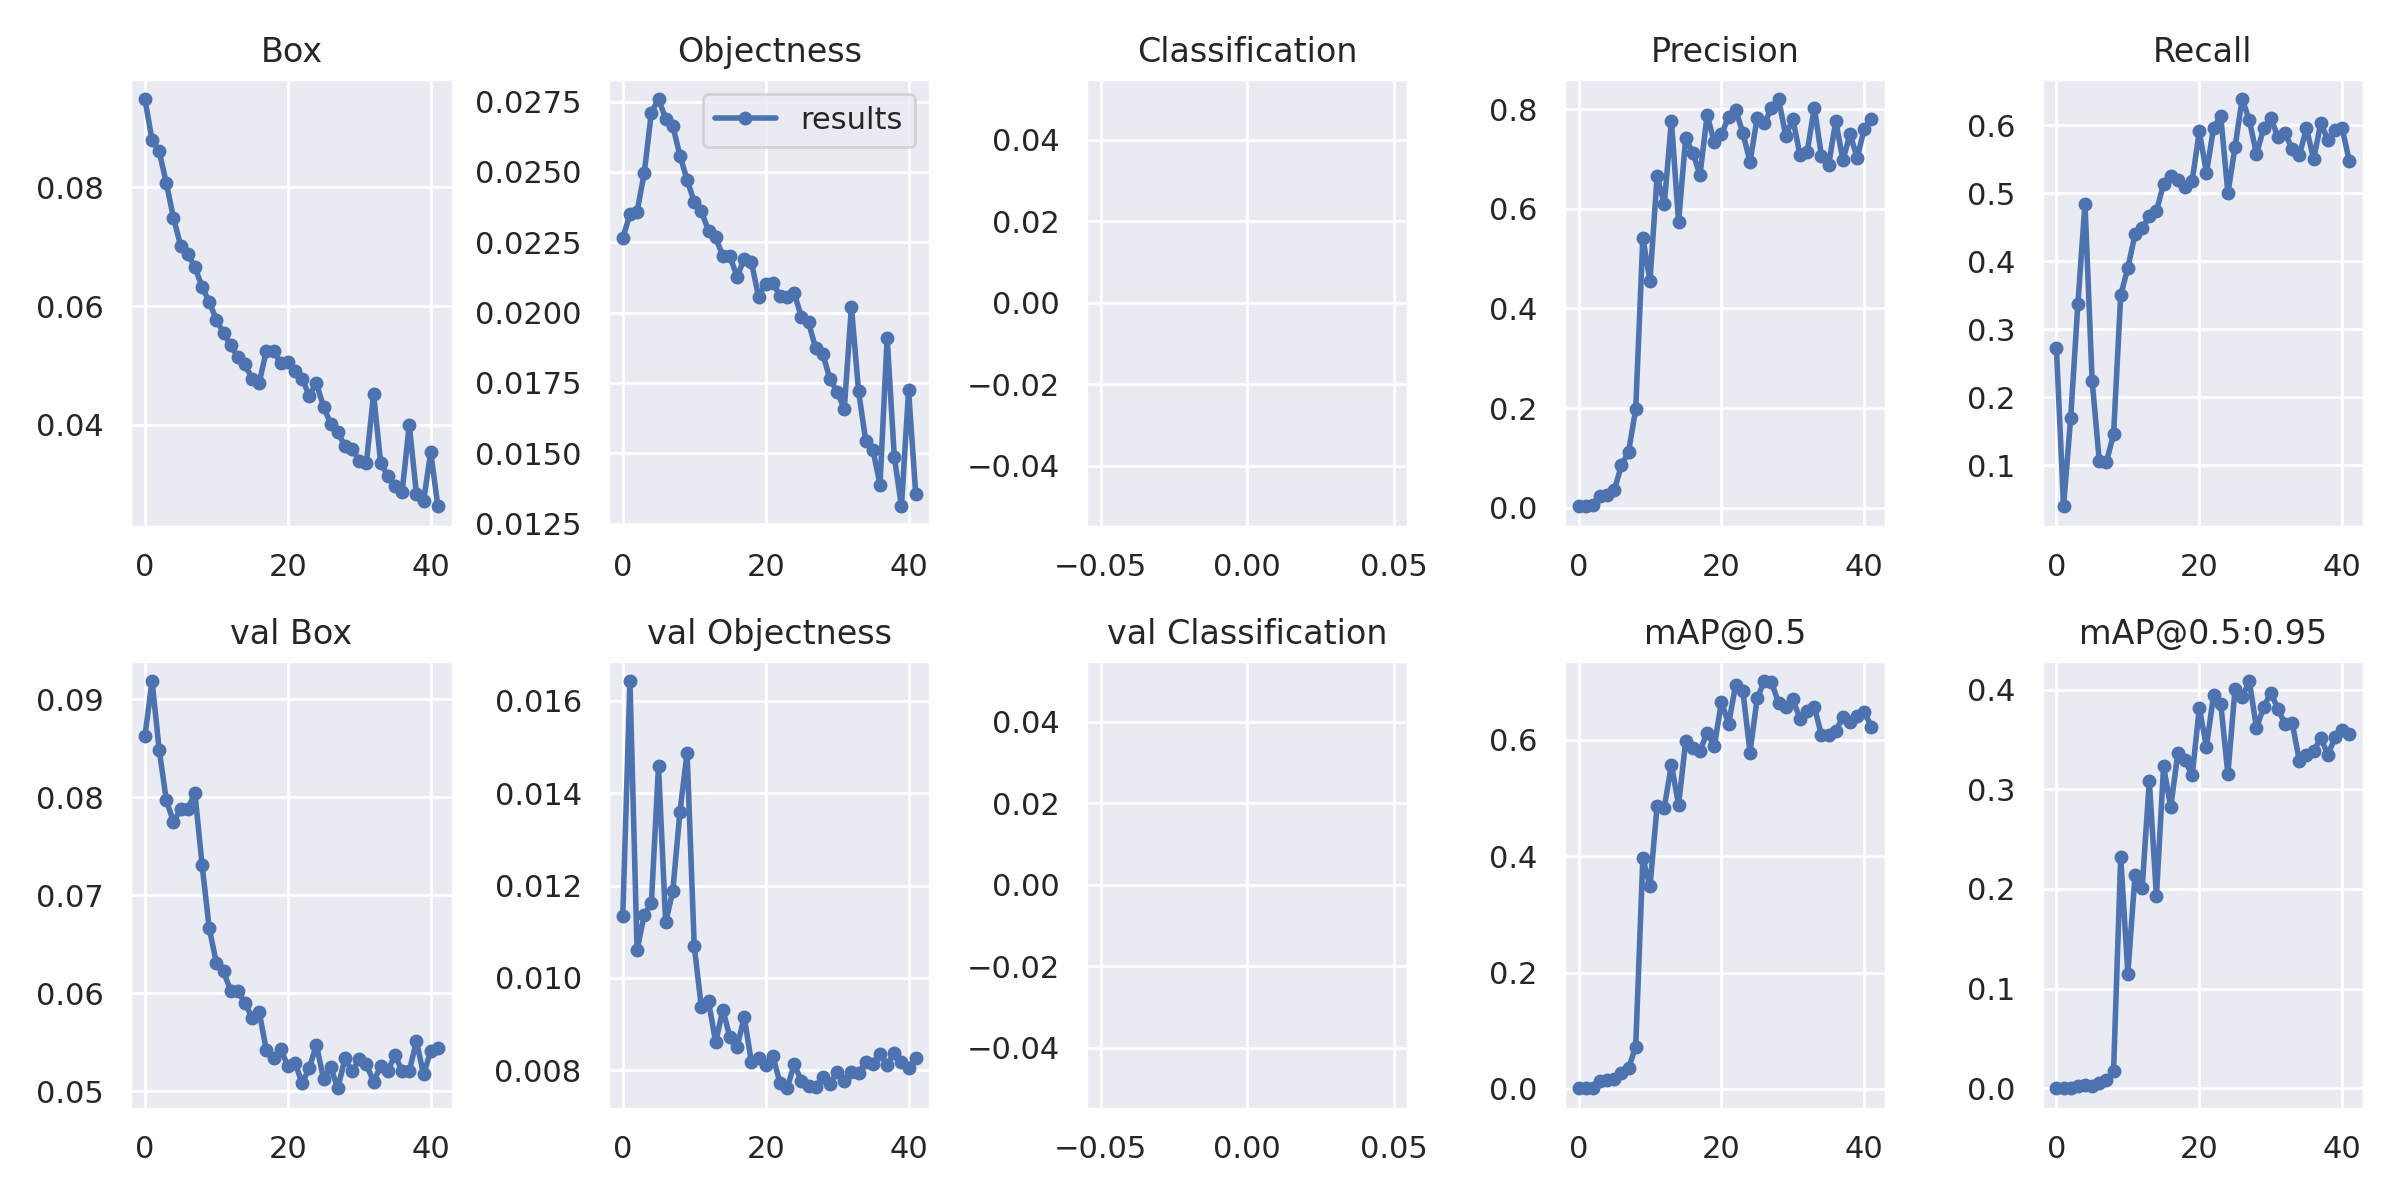

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/yolov5_gun_detector2/yolov5/runs/train/yolov5s_results8/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


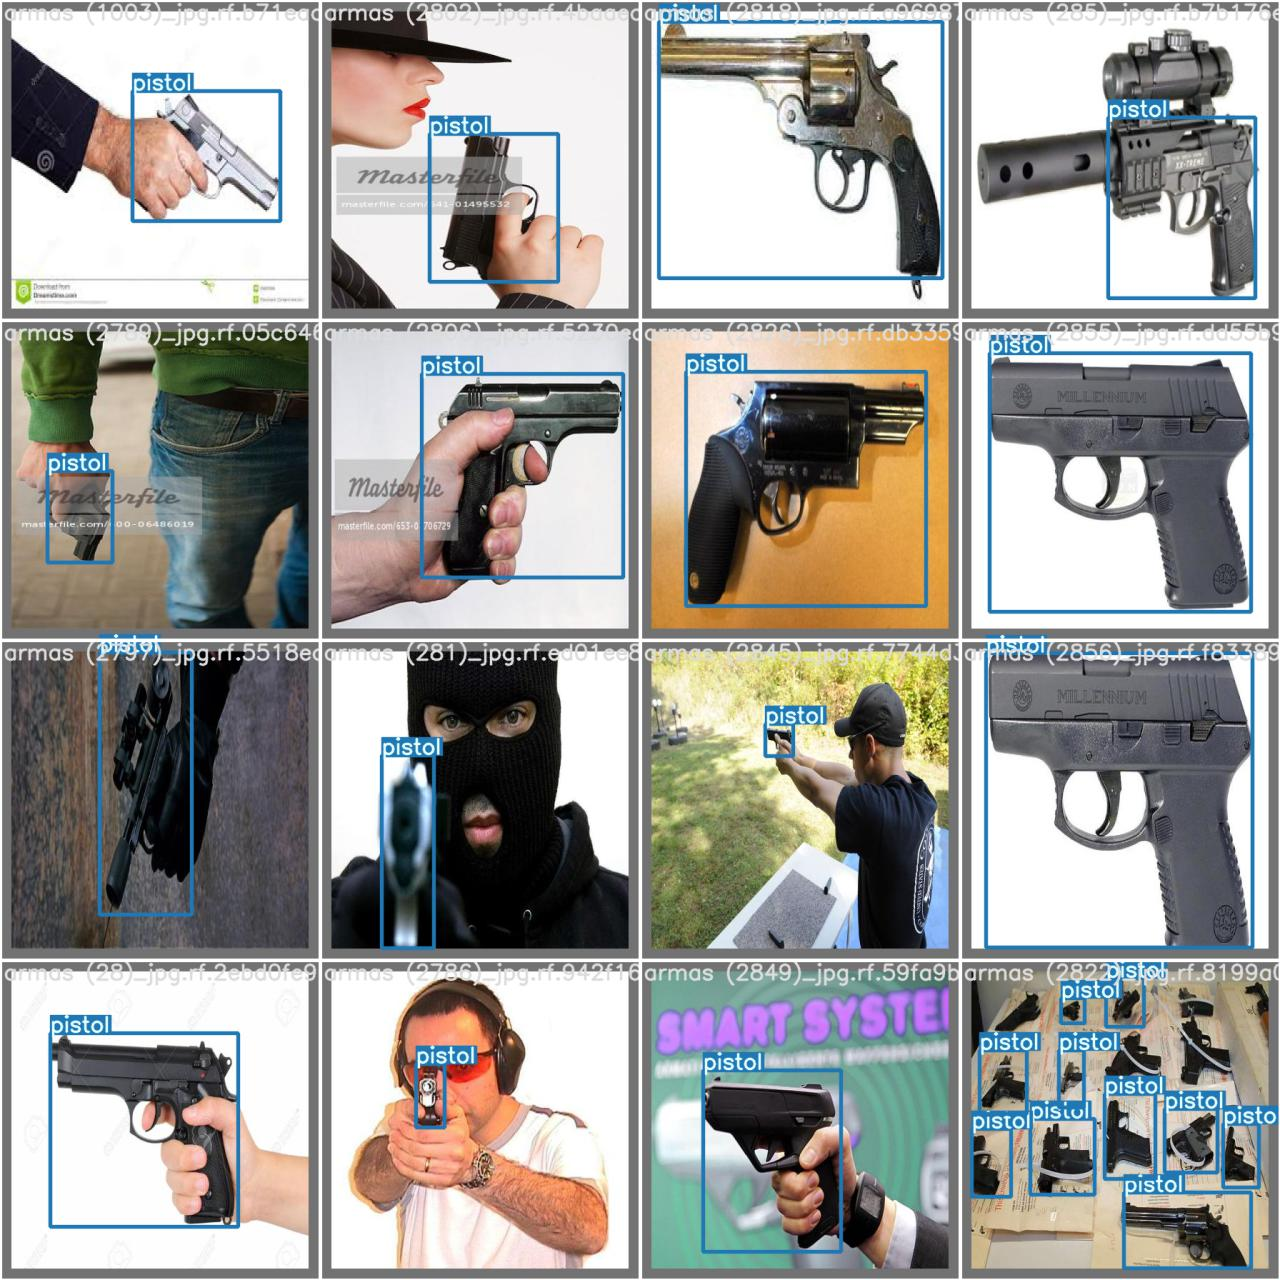

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/drive/MyDrive/yolov5_gun_detector2/yolov5/runs/train/yolov5s_results8/test_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


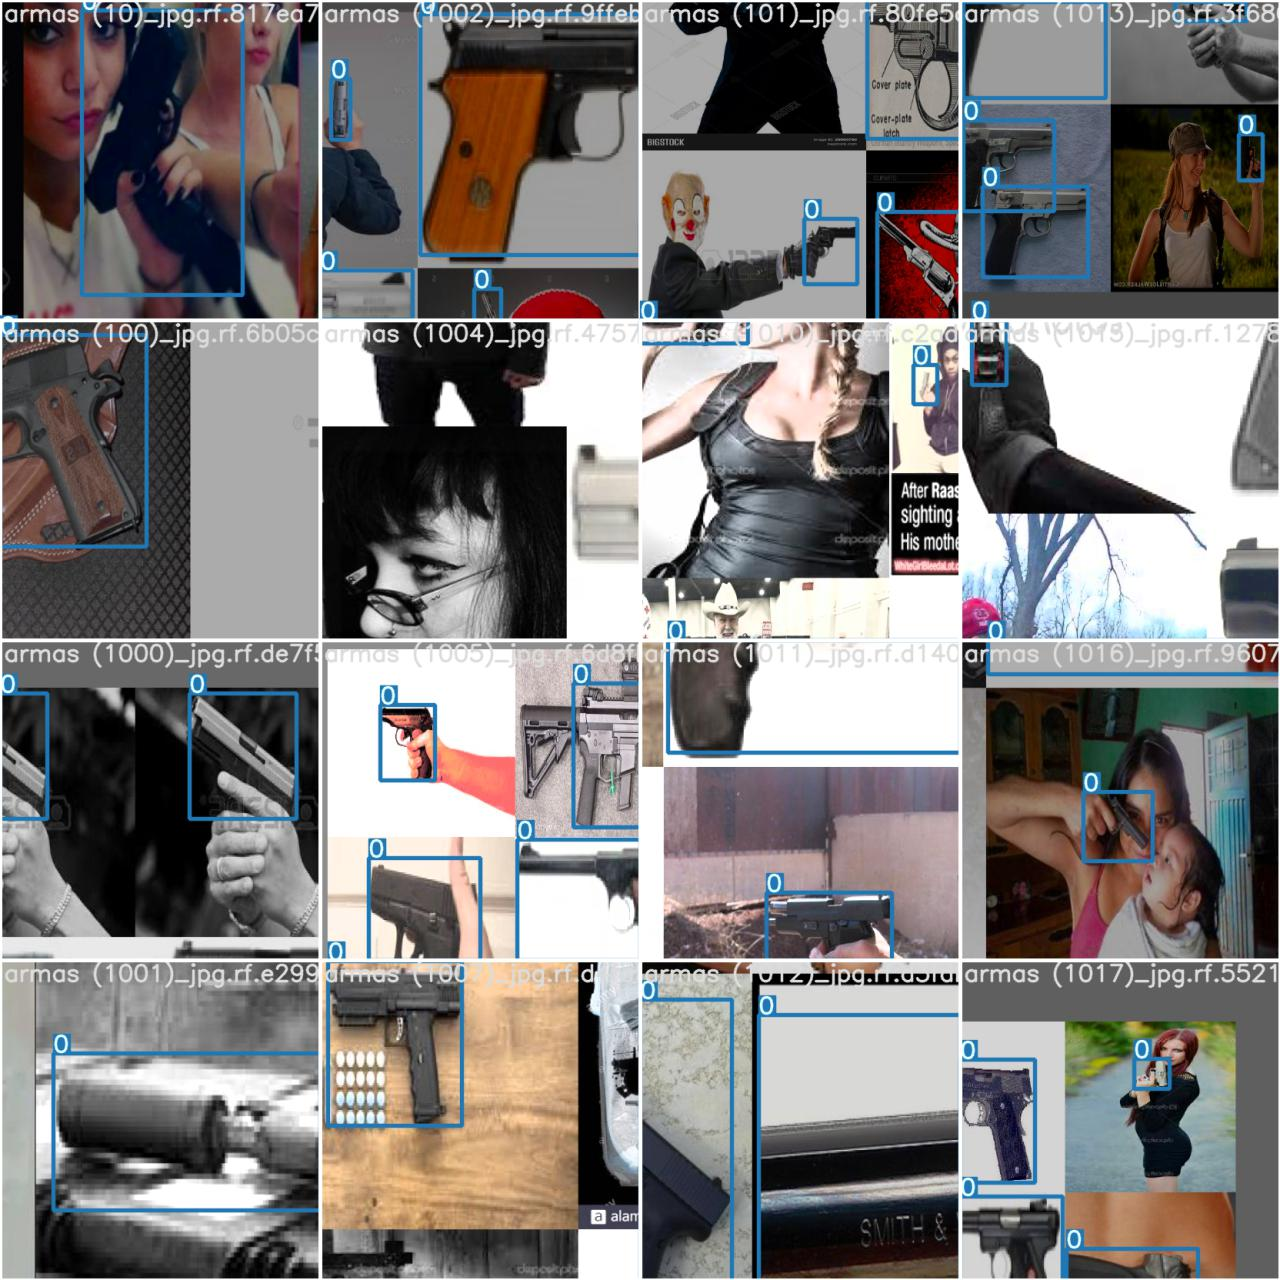

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/yolov5_gun_detector2/yolov5/runs/train/yolov5s_results8/train_batch0.jpg', width=900)

In [ ]:
%ls runs

train/


In [ ]:
%ls /content/drive/MyDrive/yolov5_gun_detector2/yolov5/runs/train/yolov5s_results8/weights

best.pt  last.pt


In [ ]:
%cd /content/drive/MyDrive/yolov5_gun_detector2/yolov5

/content/drive/MyDrive/yolov5_gun_detector2/yolov5


In [ ]:
!python detect.py --weights runs/train/yolov5s_results8/weights/best.pt --img 416 --conf 0.4 --source ../test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['runs/train/yolov5s_results8/weights/best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/298 /content/drive/MyDrive/yolov5_gun_detector2/yolov5/../test/images/armas (1)_jpg.rf.c4150f819f9dc2ae75336e5b64e67d67.jpg: 416x416 1 pistol, Done. (0.232s)
image 2/298 /content/drive/MyDrive/yolov5_gun_detector2/yolov5/../test/images/armas (1009)_jpg.rf.08def879901d075fa14bce9433d1f62a.jpg: 416x416 Done. (0.211s)
image 3/298 /content/drive/MyDrive/yolov5_gun_detector2/yolov5/../test/images/armas (1045)_jpg.rf.90f6bd69c7046aab9818ab7274eb4b9c.jpg: 416x416 1 pistol, Done. (0.201s)
image 4/298 /content/drive/MyDrive/yolov5_gun_detector2/

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/yolov5_gun_detector2/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

# FLASK

In [ ]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [ ]:
%ls

 assets/                nnlm-en-dim50_2@           yolov5-flask2
'Getting started.pdf'   QGEN/                      yolov5_gun_detector/
 glove.6B.100d.txt      RECEIPT_220377068979.pdf   yolov5_gun_detector2/
 glove.6B.200d.txt      saved_model.pb             zindimodel/
 glove.6B.300d.txt      transformerModels/         zindi-news-class@
 glove.6B.50d.txt       variables/
 glove.6B.zip           yolov5-flask1


In [ ]:
%cd /content/drive/MyDrive/yolov5-flask-main

/content/drive/MyDrive/yolov5-flask-main


In [ ]:
!ls

app.py	LICENSE  README.md  runs  static  templates  yolov5s.pt


In [ ]:
pip install flask-ngrok

In [ ]:
!python app.py

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2021-6-19 torch 1.7.0 CPU

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
pip install torch==1.7.0

     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102


In [ ]:
pip install torchvision==0.8.1

     |████████████████████████████████| 12.7MB 5.4MB/s 
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
